# Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem definition

> How well can we predict the future sale price of a buildozer, given it's characteristics and previous examples of how much similar buildozers have been sold for ? 

## 2. Data

The data is downloaded from the Kaggle Bluebook for bulldozers competition:

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

Note: The goal for most regression evaluation metrics is to minimize the prediction error.

## 4. Features

Kaggle provides a data doctionary detailing all of the features of the dataset.

|    | Variable                 | Description                                                                                                                                                                                                                   |
|---:|:-------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | SalesID                  | unique identifier of a particular sale of a machine at auction                                                                                                                                                                |
|  1 | MachineID                | identifier for a particular machine;  machines may have multiple sales                                                                                                                                                        |
|  2 | ModelID                  | identifier for a unique machine model (i.e. fiModelDesc)                                                                                                                                                                      |
|  3 | datasource               | source of the sale record;  some sources are more diligent about reporting attributes of the machine than others.  Note that a particular datasource may report on multiple auctioneerIDs.                                    |
|  4 | auctioneerID             | identifier of a particular auctioneer, i.e. company that sold the machine at auction.  Not the same as datasource.                                                                                                            |
|  5 | YearMade                 | year of manufacturer of the Machine                                                                                                                                                                                           |
|  6 | MachineHoursCurrentMeter | current usage of the machine in hours at time of sale (saledate);  null or 0 means no hours have been reported for that sale                                                                                                  |
|  7 | UsageBand                | value (low, medium, high) calculated comparing this particular Machine-Sale hours to average usage for the fiBaseModel;  e.g. 'Low' means this machine has less hours given it's lifespan relative to average of fiBaseModel. |
|  8 | Saledate                 | time of sale                                                                                                                                                                                                                  |
|  9 | Saleprice                | cost of sale in USD                                                                                                                                                                                                           |
| 10 | fiModelDesc              | Description of a unique machine model (see ModelID); concatenation of fiBaseModel & fiSecondaryDesc & fiModelSeries & fiModelDescriptor                                                                                       |
| 11 | fiBaseModel              | disaggregation of fiModelDesc                                                                                                                                                                                                 |
| 12 | fiSecondaryDesc          | disaggregation of fiModelDesc                                                                                                                                                                                                 |
| 13 | fiModelSeries            | disaggregation of fiModelDesc                                                                                                                                                                                                 |
| 14 | fiModelDescriptor        | disaggregation of fiModelDesc                                                                                                                                                                                                 |
| 15 | ProductSize              | Don't know what this is                                                                                                                                                                                                       |
| 16 | ProductClassDesc         | description of 2nd level hierarchical grouping (below ProductGroup) of fiModelDesc                                                                                                                                            |
| 17 | State                    | US State in which sale occurred                                                                                                                                                                                               |
| 18 | ProductGroup             | identifier for top-level hierarchical grouping of fiModelDesc                                                                                                                                                                 |
| 19 | ProductGroupDesc         | description of top-level hierarchical grouping of fiModelDesc                                                                                                                                                                 |
| 20 | Drive_System             | machine configuration;  typcially describes whether 2 or 4 wheel drive                                                                                                                                                        |
| 21 | Enclosure                | machine configuration - does machine have an enclosed cab or not                                                                                                                                                              |
| 22 | Forks                    | machine configuration - attachment used for lifting                                                                                                                                                                           |
| 23 | Pad_Type                 | machine configuration - type of treads a crawler machine uses                                                                                                                                                                 |
| 24 | Ride_Control             | machine configuration - optional feature on loaders to make the ride smoother                                                                                                                                                 |
| 25 | Stick                    | machine configuration - type of control                                                                                                                                                                                       |
| 26 | Transmission             | machine configuration - describes type of transmission;  typically automatic or manual                                                                                                                                        |
| 27 | Turbocharged             | machine configuration - engine naturally aspirated or turbocharged                                                                                                                                                            |
| 28 | Blade_Extension          | machine configuration - extension of standard blade                                                                                                                                                                           |
| 29 | Blade_Width              | machine configuration - width of blade                                                                                                                                                                                        |
| 30 | Enclosure_Type           | machine configuration - does machine have an enclosed cab or not                                                                                                                                                              |
| 31 | Engine_Horsepower        | machine configuration - engine horsepower rating                                                                                                                                                                              |
| 32 | Hydraulics               | machine configuration - type of hydraulics                                                                                                                                                                                    |
| 33 | Pushblock                | machine configuration - option                                                                                                                                                                                                |
| 34 | Ripper                   | machine configuration - implement attached to machine to till soil                                                                                                                                                            |
| 35 | Scarifier                | machine configuration - implement attached to machine to condition soil                                                                                                                                                       |
| 36 | Tip_control              | machine configuration - type of blade control                                                                                                                                                                                 |
| 37 | Tire_Size                | machine configuration - size of primary tires                                                                                                                                                                                 |
| 38 | Coupler                  | machine configuration - type of implement interface                                                                                                                                                                           |
| 39 | Coupler_System           | machine configuration - type of implement interface                                                                                                                                                                           |
| 40 | Grouser_Tracks           | machine configuration - describes ground contact interface                                                                                                                                                                    |
| 41 | Hydraulics_Flow          | machine configuration - normal or high flow hydraulic system                                                                                                                                                                  |
| 42 | Track_Type               | machine configuration - type of treads a crawler machine uses                                                                                                                                                                 |
| 43 | Undercarriage_Pad_Width  | machine configuration - width of crawler treads                                                                                                                                                                               |
| 44 | Stick_Length             | machine configuration - length of machine digging implement                                                                                                                                                                   |
| 45 | Thumb                    | machine configuration - attachment used for grabbing                                                                                                                                                                          |
| 46 | Pattern_Changer          | machine configuration - can adjust the operator control configuration to suit the user                                                                                                                                        |
| 47 | Grouser_Type             | machine configuration - type of treads a crawler machine uses                                                                                                                                                                 |
| 48 | Backhoe_Mounting         | machine configuration - optional interface used to add a backhoe attachment                                                                                                                                                   |
| 49 | Blade_Type               | machine configuration - describes type of blade                                                                                                                                                                               |
| 50 | Travel_Controls          | machine configuration - describes operator control configuration                                                                                                                                                              |
| 51 | Differential_Type        | machine configuration - differential type, typically locking or standard                                                                                                                                                      |
| 52 | Steering_Controls        | machine configuration - describes operator control configuration                                                                                                                                                              |

In [1]:
# Tools for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and feature imputting 
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

# Machine learning models
from sklearn.ensemble import RandomForestRegressor

# Model evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

# Hyperparameters tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [3]:
df=pd.read_csv('data/TrainAndValid.csv',low_memory=False,parse_dates=['saledate'])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

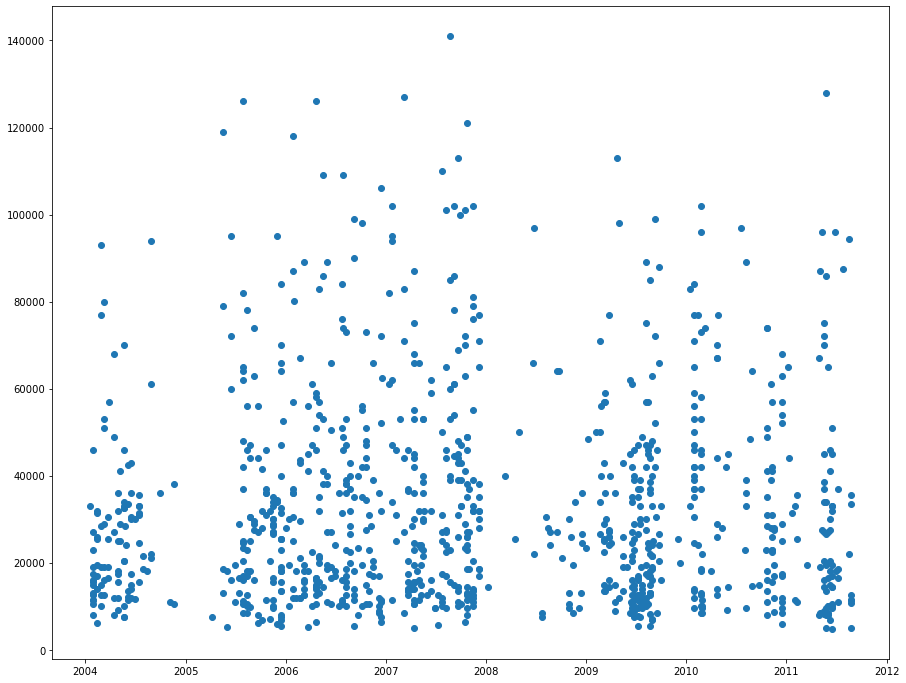

In [6]:
fig, ax =plt.subplots(figsize=(15,12))
ax.scatter(df['saledate'][:1000],df['SalePrice'][:1000])

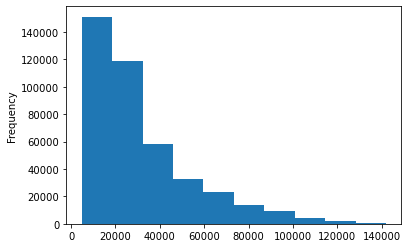

In [7]:
df['SalePrice'].plot.hist();

In [8]:
df.dtypes

SalesID                              int64
SalePrice                          float64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

In [9]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [11]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

When working with time series, it's a good idea to sort it by date.

In [12]:
# Sort DataFrame in date order

df.sort_values(by=['saledate'],ascending=True,inplace=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.


In [13]:
# Make a copy
df_tmp = df.copy()
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


### Add datetime parameters for `saledate` column

In [14]:
df_tmp['saleYear'] = df_tmp['saledate'].dt.year
df_tmp['saleMonth'] = df_tmp['saledate'].dt.month
df_tmp['saleDay'] = df_tmp['saledate'].dt.day
df_tmp['saleDayOfWeek'] = df_tmp['saledate'].dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp['saledate'].dt.dayofyear


In [15]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [16]:
# Now we've enriched our DataFrame with date time features, we can remove saledate column
df_tmp.drop("saledate",axis=1,inplace=True)

In [17]:
df_tmp.head(1).T

,205615
SalesID,1646770
SalePrice,9500.0
MachineID,1126363
ModelID,8434
datasource,132
auctioneerID,18.0
YearMade,1974
MachineHoursCurrentMeter,NaN
UsageBand,NaN
fiModelDesc,TD20


In [18]:
# Check the values of different columns
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling
We've done enough EDA (we could always do more) but let's start to do some model-driven EDA.

In [19]:
# Let's build a machine learning model

# Split data into X & y
X = df_tmp.drop('SalePrice',axis=1)
y = df_tmp['SalePrice']

model = RandomForestRegressor(n_jobs=-1,random_state=42)
# model.fit(X,y)
# returns an error because we need to impute and encode the independent features

In [20]:
df_tmp['UsageBand'].dtype

dtype('O')

In [21]:
df_tmp['UsageBand'].value_counts()

Medium    35832
Low       25311
High      12527
Name: UsageBand, dtype: int64

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas catgories.

In [22]:
df_tmp.head(1).T

,205615
SalesID,1646770
SalePrice,9500.0
MachineID,1126363
ModelID,8434
datasource,132
auctioneerID,18.0
YearMade,1974
MachineHoursCurrentMeter,NaN
UsageBand,NaN
fiModelDesc,TD20


In [23]:
pd.api.types.is_string_dtype(df_tmp['UsageBand'])

True

In [25]:
# Find  the columns which contain strings

for label, content in df_tmp.items():
    if (pd.api.types.is_string_dtype(content)):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [30]:
# This will turn all of the string value into category values

for label , content in df_tmp.items():
    if (pd.api.types.is_string_dtype(content)):
        df_tmp[label]=content.astype('category').cat.as_ordered()

In [31]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [34]:
df_tmp['state'].cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [35]:
df_tmp['state'].cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [43]:
df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [44]:
# Save preprocessed data
# Export current tmp dataframe
df_tmp.to_csv('data/train_tmp.csv',index=False)

In [2]:
# Import preprocessed data
df_tmp=pd.read_csv('data/train_tmp.csv',low_memory=False)
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


## Fill missing values
### Fill numerical missing values first

In [47]:
# Check numerical values
for label , content in df_tmp.items():
    if (pd.api.types.is_numeric_dtype(content)):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [54]:
# Check for which numeric columns have null values
for label , content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [55]:
# Check for which numeric columns have null values
for label , content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).any():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [3]:
# Fill numeric rows with the median
for label , content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing
            df_tmp[label+'_is_missing']=pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label]=content.fillna(content.median())

In [4]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [8]:
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [64]:
# Demonstrate how median is more robust that mean

hundreds = np.full((1000,),100)
hundreds_billion = np.append(hundreds,10**9)
hundreds.mean() , hundreds_billion.mean(), np.median(hundreds) , np.median(hundreds_billion) hundreds

(100.0, 999100.8991008991, 100.0, 100.0)

In [9]:
# Check if there's any null numeric values
for label , content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).any():
            print(label)

### Filling and turning categprical variables into numbers


In [76]:
# Check for columns which aren't numeric
for label , content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(f"{label}, \t{content.isna().sum()}")

UsageBand, 	339028
fiModelDesc, 	0
fiBaseModel, 	0
fiSecondaryDesc, 	140727
fiModelSeries, 	354031
fiModelDescriptor, 	337882
ProductSize, 	216605
fiProductClassDesc, 	0
state, 	0
ProductGroup, 	0
ProductGroupDesc, 	0
Drive_System, 	305611
Enclosure, 	334
Forks, 	214983
Pad_Type, 	331602
Ride_Control, 	259970
Stick, 	331602
Transmission, 	224691
Turbocharged, 	331602
Blade_Extension, 	386715
Blade_Width, 	386715
Enclosure_Type, 	386715
Engine_Horsepower, 	386715
Hydraulics, 	82565
Pushblock, 	386715
Ripper, 	305753
Scarifier, 	386704
Tip_Control, 	386715
Tire_Size, 	315060
Coupler, 	192019
Coupler_System, 	367724
Grouser_Tracks, 	367823
Hydraulics_Flow, 	367823
Track_Type, 	310505
Undercarriage_Pad_Width, 	309782
Stick_Length, 	310437
Thumb, 	310366
Pattern_Changer, 	310437
Grouser_Type, 	310505
Backhoe_Mounting, 	331986
Blade_Type, 	330823
Travel_Controls, 	330821
Differential_Type, 	341134
Steering_Controls, 	341176


In [5]:
# Turn categorical variables into numbers and fill missing
for label , content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate wheter sample had missing value
        df_tmp[label+'_is_missing'] = pd.isnull(content)
        
        # Turn categories into numbers and add +1 because missing values got -1
        df_tmp[label] = pd.Categorical(content).codes +1

In [6]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [7]:
df_tmp.dtypes

SalesID                           int64
SalePrice                       float64
MachineID                         int64
ModelID                           int64
datasource                        int64
                                 ...   
Backhoe_Mounting_is_missing        bool
Blade_Type_is_missing              bool
Travel_Controls_is_missing         bool
Differential_Type_is_missing       bool
Steering_Controls_is_missing       bool
Length: 103, dtype: object

Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.

In [13]:
len(df_tmp)

412698

In [83]:
%%time

# Instantiate model
model = RandomForestRegressor(n_jobs=-1,random_state=42)

# Split data into X and y
X = df_tmp.drop('SalePrice',axis=1)
y = df_tmp['SalePrice']

# Fit the model
model.fit(X,y)

CPU times: user 26min 25s, sys: 5.79 s, total: 26min 31s
Wall time: 3min 32s


RandomForestRegressor(n_jobs=-1)

In [85]:
# Score the model
model.score(X,y)

0.9875665319923022

In [15]:
df_tmp["saleYear"].value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: saleYear, dtype: int64

In [8]:
# Split data into train and validation sets
df_valid = df_tmp[df_tmp.saleYear==2012]
df_train = df_tmp[df_tmp.saleYear!=2012]

len(df_train), len(df_valid)

(401125, 11573)

In [9]:
# Split data into X and y

X_train, y_train = df_train.drop('SalePrice',axis=1), df_train['SalePrice']
X_valid, y_valid = df_valid.drop('SalePrice',axis=1), df_valid['SalePrice']

X_train.shape , y_train.shape, X_valid.shape , y_valid.shape 

((401125, 102), (401125,), (11573, 102), (11573,))

In [10]:
# Create evaluation function (The competition uses RMSLE)

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {
        "Training MAE": mean_absolute_error(y_train,train_preds),
        "Valid MAE" :mean_absolute_error(y_valid,val_preds),
        "Training RMSLE": rmsle(y_train,train_preds),
        "Valid RMSLE":rmsle(y_valid,val_preds),
        "Training R^2":r2_score(y_train,train_preds),
        "Valid R^2":r2_score(y_valid,val_preds)
    }
    return scores

## Testing our model on a subset (to tune the hyperparameters)

In [21]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1, random_state=42, max_samples=10000)

In [22]:
%%time
# Cutting down on the max number of samples each estimator can see impacte
model.fit(X_train,y_train)

CPU times: user 43.5 s, sys: 462 ms, total: 44 s
Wall time: 7.74 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [27]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

## Hyperparameter tuning with RandomizedSearchCV

In [31]:
%%time

# Different RandomForestRegressor hyperparameters
rf_rand = {
    'n_estimators': np.arange(10,1000,10),
    "max_depth": [None, 3 , 5 , 10],
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2) ,
    'max_features': [0.5, 1, "sqrt",'auto'],
    "max_samples" : [1000]
}
# Instantiate RandomizedSearchCV

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,random_state=42),
                              param_distributions=rf_rand,
                              n_iter=20,
                              cv=5, 
                              verbose=2)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=5, max_features=1, max_samples=1000, min_samples_leaf=15, min_samples_split=12, n_estimators=540; total time=   6.0s
[CV] END max_depth=5, max_features=1, max_samples=1000, min_samples_leaf=15, min_samples_split=12, n_estimators=540; total time=   4.8s
[CV] END max_depth=5, max_features=1, max_samples=1000, min_samples_leaf=15, min_samples_split=12, n_estimators=540; total time=   4.8s
[CV] END max_depth=5, max_features=1, max_samples=1000, min_samples_leaf=15, min_samples_split=12, n_estimators=540; total time=   4.8s
[CV] END max_depth=5, max_features=1, max_samples=1000, min_samples_leaf=15, min_samples_split=12, n_estimators=540; total time=   4.8s
[CV] END max_depth=3, max_features=auto, max_samples=1000, min_samples_leaf=1, min_samples_split=6, n_estimators=560; total time=   6.1s
[CV] END max_depth=3, max_features=auto, max_samples=1000, min_samples_leaf=1, min_samples_split=6, n_estimators=560; tot

[CV] END max_depth=5, max_features=auto, max_samples=1000, min_samples_leaf=5, min_samples_split=12, n_estimators=120; total time=   3.4s
[CV] END max_depth=5, max_features=auto, max_samples=1000, min_samples_leaf=5, min_samples_split=12, n_estimators=120; total time=   3.4s
[CV] END max_depth=5, max_features=auto, max_samples=1000, min_samples_leaf=5, min_samples_split=12, n_estimators=120; total time=   3.4s
[CV] END max_depth=5, max_features=auto, max_samples=1000, min_samples_leaf=5, min_samples_split=12, n_estimators=120; total time=   3.4s
[CV] END max_depth=5, max_features=auto, max_samples=1000, min_samples_leaf=5, min_samples_split=12, n_estimators=120; total time=   3.5s
[CV] END max_depth=10, max_features=auto, max_samples=1000, min_samples_leaf=3, min_samples_split=4, n_estimators=190; total time=   4.3s
[CV] END max_depth=10, max_features=auto, max_samples=1000, min_samples_leaf=3, min_samples_split=4, n_estimators=190; total time=   4.2s
[CV] END max_depth=10, max_feature

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  9...
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 

In [32]:
rs_model.best_params_

{'n_estimators': 740,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_samples': 1000,
 'max_features': 'auto',
 'max_depth': None}

In [33]:
show_scores(rs_model)

{'Training MAE': 7620.04403814497,
 'Valid MAE': 9141.456749050094,
 'Training RMSLE': 0.33929309661937673,
 'Valid RMSLE': 0.3734929398520934,
 'Training R^2': 0.7584398748491868,
 'Valid R^2': 0.7482320021999619}

### Train a model with best hyperparameters

**Note:** The were found after 100 iterations of `RandomizedSearchCV`

In [43]:
%%time

# Most ideal hyperparameters

ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   max_samples=None,
                                    n_jobs=-1)
# Fit the ideal model
ideal_model.fit(X_train,y_train)

# Evaluate th idea model
show_scores(ideal_model)

CPU times: user 5min 20s, sys: 1.18 s, total: 5min 21s
Wall time: 46.6 s


{'Training MAE': 2952.99018024811,
 'Valid MAE': 5964.210565971723,
 'Training RMSLE': 0.1445844479577117,
 'Valid RMSLE': 0.2458410083851191,
 'Training R^2': 0.9589213544163568,
 'Valid R^2': 0.8805744793772792}

## Make predictions on test data

In [44]:
# Import the test data

df_test = pd.read_csv("data/Test.csv",low_memory=False, parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [45]:
# Make predictions on the test dataset

#test_preds = ideal_model.predict(df_test)
# Returns error because our data isn't processed yet

In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [47]:
df_test.dtypes

SalesID                              int64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                         int64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type                            object
Ride_Contro

In [48]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


## Preprocessing the data (getting the test dataset in the same format as pur training dataset)

In [49]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df['saleYear'] = df['saledate'].dt.year
    df['saleMonth'] = df['saledate'].dt.month
    df['saleDay'] = df['saledate'].dt.day
    df['saleDayOfWeek'] = df['saledate'].dt.dayofweek
    df['saleDayOfYear'] = df['saledate'].dt.dayofyear
    df.drop('saledate', axis=1, inplace=True)
    
    # Fill numeric rows with median
    for label , content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary comns which tells us if the data was missing
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
         # Fill categorical missing data and turn categories into numerical values
        
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories into -1
            df[label] = pd.Categorical(content).codes + 1 
    return df

In [50]:
# Process test data
df_test = preprocess_data(df_test)

In [51]:
set((X_train.columns)).difference(set(df_test))

{'auctioneerID_is_missing'}

In [52]:
df_test["auctioneerID_is_missing"] = False

In [53]:
set((X_train.columns)).difference(set(df_test.columns))

set()

In [54]:
# Reorder columns of test dataset to suit train dataframe
df_test.columns = X_train.columns.to_list()

In [55]:
# Make predictions on the test dataset
test_preds = ideal_model.predict(df_test)

In [56]:
test_preds

array([21846.67870084, 22032.34009804, 49044.88601299, ...,
       15090.56502778, 17581.46798903, 28802.051898  ])

In [57]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

In [58]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

In [59]:
# Format predictions into the same format Kaggle is after

df_preds = pd.DataFrame({
    "SalesID": df_test["SalesID"],
    "SalesPrice":test_preds
})
df_preds.head()

,SalesID,SalesPrice
0,1227829,21846.678701
1,1227844,22032.340098
2,1227847,49044.886013
3,1227848,61357.446006
4,1227863,48302.775271


In [60]:
# Export data to csv
df_preds.to_csv('data/test_predictions.csv',index=False)

### Features importance

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the **target varaibles** (SalePrice).

In [61]:
# Find feature importance of our best model

ideal_model.feature_importances_

array([3.36089285e-02, 2.12295924e-02, 4.20008154e-02, 2.01412729e-03,
       3.39745268e-03, 1.99122936e-01, 3.19508650e-03, 1.04969843e-03,
       4.59130252e-02, 3.98641656e-02, 6.38811374e-02, 5.05802887e-03,
       1.49179429e-02, 1.38472615e-01, 4.69564676e-02, 5.98575698e-03,
       1.83988998e-03, 3.72300505e-03, 4.49994645e-03, 6.37755398e-02,
       1.31233583e-03, 5.68327368e-05, 7.94735771e-04, 1.49707045e-04,
       9.99299562e-04, 8.38478338e-05, 7.37699344e-05, 8.14152102e-03,
       2.29145399e-03, 3.92169419e-04, 1.42746770e-03, 3.10215504e-03,
       3.00551160e-03, 2.43067945e-03, 6.21808110e-03, 1.17187896e-02,
       7.87754965e-04, 1.34629619e-02, 3.09442958e-03, 1.25441136e-03,
       1.17622438e-03, 9.17825023e-04, 2.12741297e-03, 5.75948644e-04,
       5.30849061e-04, 3.15477199e-04, 4.40765348e-04, 2.91982058e-03,
       8.77152160e-04, 4.09233583e-04, 3.22519843e-04, 7.34838358e-02,
       3.75337538e-03, 5.67375742e-03, 2.93905495e-03, 9.82761532e-03,
      

In [65]:
# Helper function for plotting feature importance

def plot_features(columns, importance, n = 20):
    df = (pd.DataFrame({
                "features": columns,
        "feature_importances": importance
    })).sort_values("feature_importances",ascending=False).reset_index(drop=True)
    
    # Plot the dataframe
    fig , ax = plt.subplots()
    ax.barh(df['features'][:n],df['feature_importances'][:n])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature importance')
    ax.invert_yaxis()

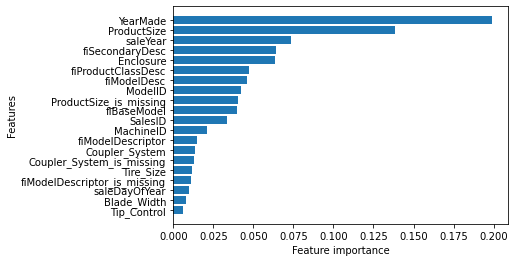

In [67]:
plot_features(X_train.columns,ideal_model.feature_importances_)